In the previous notebook you simulated the Dubins Car model by choosing random steering angles. In this case, you'll consider the case where you have a destination `x2` in mind, and you guess controls that move you toward your destination (maybe ;). 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = 12, 12

Implement a function called `steer()`, which takes as inputs two states `x1` and `x2` and returns a control input (steering angle) that "tries" to make progress from `x1` to `x2`. This method should consist roughly of the following:

1. Get a sense of where `x2` is relative to the state of `x1` by calculating the orientation difference between the current orientation, $\theta$, and the direction toward `x2`.
2. Generate a random steering angle by sampling from a gaussian that is centered roughly on some direction that will move you from `x1` to `x2`.
3. Clip the angle if it is outside the range allowed by `MAX_STEERING_ANGLE`.

This might all sound a little fuzzy, but that's the idea here! We're just going to try some guessing and see if we can find a simple method for making progress from `x1` to `x2`.  

In [3]:
# limit the steering angle range
MAX_STEERING_ANGLE = np.deg2rad(30)

ANGLE_STDDEV = np.deg2rad(3)

def steer(x1, x2):
    theta = x1[2]
    
    angle = np.arctan2(x2[1] - x1[1], x2[0] - x1[0]) - theta
    
    angle = np.random.normal(angle, ANGLE_STDDEV)
    
    angle = np.clip(angle, -MAX_STEERING_ANGLE, MAX_STEERING_ANGLE)
    
    # TODO: return steering angle
    return angle

Modification of the Dubin's car simulation from the previous notebook.

In [4]:
def simulate(state, angle, v, dt):
    x = state[0]
    y = state[1]
    theta = state[2]    
    
    nx = x + v*np.cos(theta)*dt
    ny = y + v*np.sin(theta)*dt
    ntheta = theta + v*np.tan(angle)*dt
    
    return [nx, ny, ntheta]

Initially, we place the car at the center of the coordinate system (0, 0) and give heading of $0$ which is facing in the positive direction along the $x$ axis.

In [19]:
# travel in time increments of `dt` up until `T`.
dt = 0.1
T = 10 # 시간

start = [0, 0, 0]
goal = [10, 0, 0]

# Run the simulation 100 times to get a feel for the output
angles = [steer(start, goal) for _ in range(100)]
lines = []

for angle in angles:
    line = [start]
    state = np.copy(start)
    v = np.random.uniform(0, 1)
    for _ in np.arange(0, T, dt):
        state = simulate(state, angle, v, dt)
        line.append(state)
    lines.append(line)
    
lines = np.array(lines)
print(lines.shape)

(100, 101, 3)


Now let's visualize the path! It should be a smooth path from the start location to the goal location.

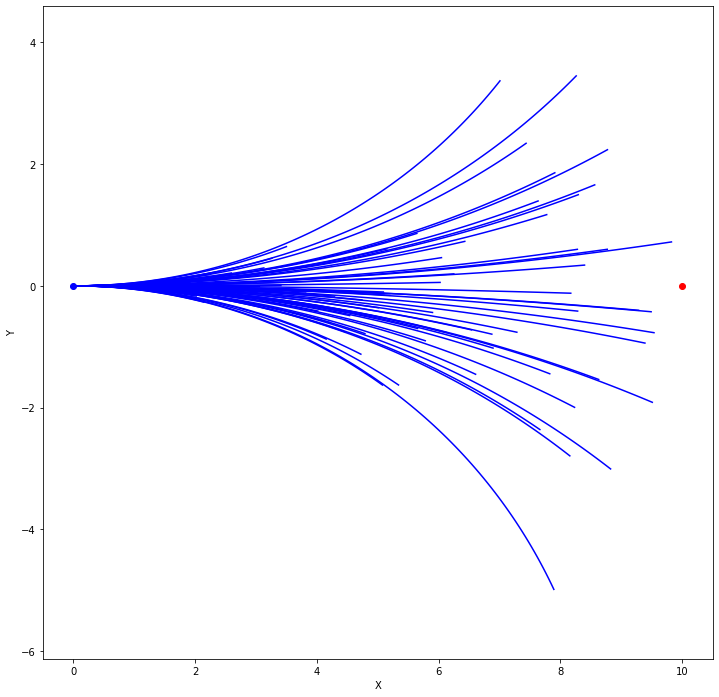

In [20]:
for i in range(lines.shape[0]):
    plt.plot(lines[i, :, 0], lines[i, :, 1], 'b-')
plt.plot(start[0], start[1], 'bo')
plt.plot(goal[0], goal[1], 'ro')
plt.axis('equal')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

[solution](/notebooks/Steering-Solution.ipynb)